<a href="https://colab.research.google.com/github/Deon254/Compiler_Construction/blob/main/Lab_Work_Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   110947 Deon Muthuri
2.   90775 Peter Mumo
3.   112633 Adan Keith
4.   109023 Ryan Gichana
5.   110328 Alfred Mwaniki






**1. Flex(Fast Lexical Analyzer Generator)**  - Is a tool for generating scanners. Instead of writing a scanner from scratch, you only need to identify the vocabulary of a certain language (e.g. Simple), write a specification of patterns using regular expressions (e.g. DIGIT [0-9]), and FLEX will construct a scanner for you. The scanner performs lexical analysis of a certain program.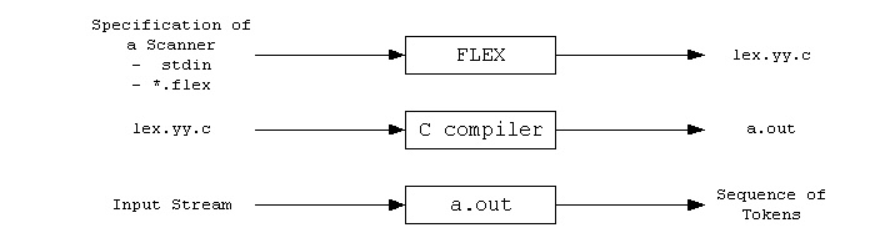


*.lex is in the form of pairs of regular expressions and C code.


lex.yy.c defines a routine yylex() that uses the specification to recognize tokens.

a.out is  the scanner!

The following flex input specifies a scanner which, whenever it encounters the string `username', will replace it with the user's login name:

In [ ]:
/* 
 * Sample Scanner1: 
 * Description: Replace the string "username" from standard input 
 *              with the user's login name (e.g. lgao)
 * Usage: (1) $ flex sample1.lex
 *        (2) $ gcc lex.yy.c -lfl
 *        (3) $ ./a.out
 *            stdin> username
 *	      stdin> Ctrl-D
 * Question: What is the purpose of '%{' and '%}'?
 *           What else could be included in this section?
 */

%{
/* need this for the call to getlogin() below */
#include <unistd.h>
%}

%%
username	printf("%s\n", getlogin());
%%

main()
{
  yylex();
}



2. **Bison** <br>
Bison is a general purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR)parser employing LALR, IELR or canonical LR parser tables. Parsing is the process of matching grammar symbols to elements in the input data, according to rules of grammar. A parser works by getting a sequence of tokens from the lexical analyzer and determines its structure in the form of a parse tree. The parse tree shows the hierarchial structure of the input data and the mapping of symbols to data elements and is nodes show grammar symbols while the edges show derivation steps. Bison is a bottom-up parser that works using shifts and reductions, that try to reduce the entire input down to a single grouping whose symbol is the grammar's start symbol. <br>
The diagram below shows the inner works of a Bison Parser:
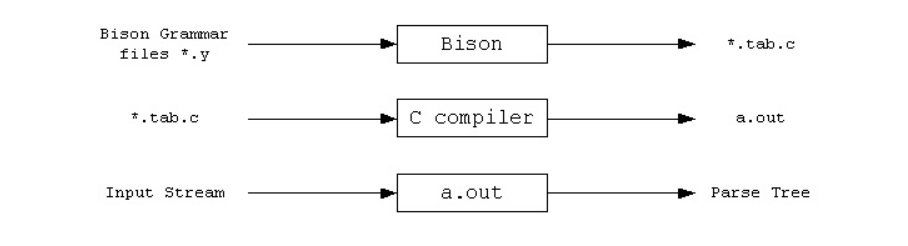
<br>
Below is a code snippet of a location tracking calculator developed using C and Bison:

In [ ]:
/* Code Snippet for Location Tracking calculator written using C and Bison Language */ 
%{
#include <math.h>
int yylex (void);
void yyerror (char const *);
%}
/* Bison declarations. */
%define api.value.type {int}
%token NUM
%left ’-’ ’+’
%left ’*’ ’/’
%precedence NEG
%right ’^’
%% /* The grammar follows. */
input:
%empty
| input line
;
line:
’\n’
| exp ’\n’ { printf ("%d\n", $1); }
;
exp:
NUM
| exp ’+’ exp { $$ = $1 + $3; }
| exp ’-’ exp { $$ = $1 - $3; }
| exp ’*’ exp { $$ = $1 * $3; }
| exp ’/’ exp
{
if ($3)
$$ = $1 / $3;
else
{
$$ = 1;
fprintf (stderr, "%d.%d-%d.%d: division by zero",
@3.first_line, @3.first_column,
@3.last_line, @3.last_column);
}
}
| ’-’ exp %prec NEG { $$ = -$2; }
| exp ’^’ exp { $$ = pow ($1, $3); }
| ’(’ exp ’)’ { $$ = $2; }
int
yylex (void)
{
int c;
/* Skip white space. */
while ((c = getchar ()) == ’ ’ || c == ’\t’)
++yylloc.last_column;
/* Step. */
yylloc.first_line = yylloc.last_line;
yylloc.first_column = yylloc.last_column;
/* Process numbers. */
if (isdigit (c))
{
yylval = c - ’0’;
++yylloc.last_column;
while (isdigit (c = getchar ()))
{
++yylloc.last_column;
yylval = yylval * 10 + c - ’0’;
}
ungetc (c, stdin);
return NUM;
}
/* Return end-of-input. */
if (c == EOF)
return YYEOF;
/* Return a single char, and update location. */
if (c == ’\n’)
{
++yylloc.last_line;
yylloc.last_column = 0;
}
else
++yylloc.last_column;
return c;
}
int
main (void)
{
yylloc.first_line = yylloc.last_line = 1;
yylloc.first_column = yylloc.last_column = 0;
return yyparse ();
}



SyntaxError: ignored

Bison References: <br>
1. https://www.gnu.org/software/bison/manual/bison.pdf
2. http://alumni.cs.ucr.edu/~lgao/teaching/bison.html#parser

### 3. Lex (Lexical Analyzer Generator)
Lex is a tool used to generate a lexical analyzer. It usually works with the YACC parser. It transforms a set of regular expressions into a corresponding finite state machine implemented in the C language. When compiled, the C program yields a lexical analyzer, which produces a stream of tokens, given character input.

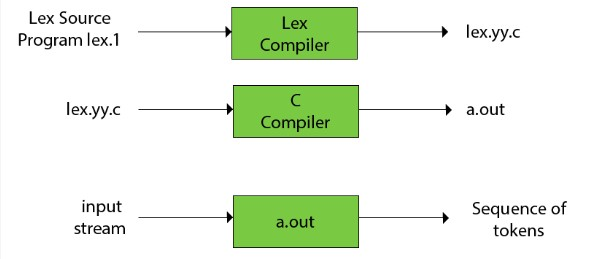

Below is a code snippet showing an example of a simple lex program.

In [ ]:
"""
/* declarations */
%{
    #include<stdio.h>
    int global_variable;
}%

/* Regular expressions to be used for rule matching*/
number [0-9]+
op[-|+|*|/|^|=]

/* rules */
%%
    {number} {printf("" number");}
    {op} {printf(" operator");}
%%

/* functions - executed after lexical analysis is done */ 
int main()
{
    yylex(); // This function stores the generated C code for the above rules
    return 1;
}

This program will output 'number' when given number input e.g 17
It will output 'operator' when given operator input e.g +
"""

Lex References:


1.   http://dinosaur.compilertools.net/lex/index.html
2.   https://www.ibm.com/docs/en/aix/7.2?topic=information-generating-lexical-analyzer-lex-command
3.   https://iq.opengenus.org/lexical-analyzer-generator-lex/



4. Yacc

Yacc provides a general tool for describing the input to a computer program. The Yacc user specifies the structures of his input, together with code to be invoked as each such structure is recognized. Yacc turns such a specification into a subroutine that handles the input process; 
The input subroutine produced by Yacc calls a user-supplied routine to return the next basic input item.
The construction of translation using YACC is illustrated in the figure below:

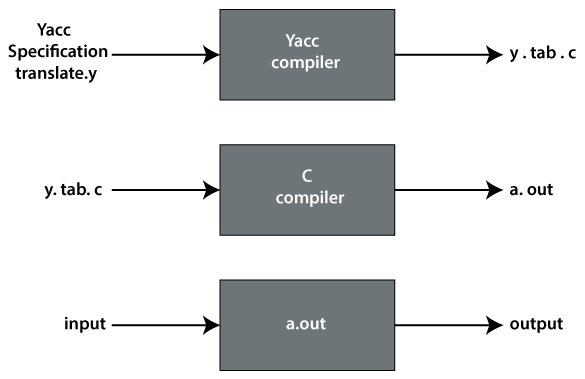

Below is an example of a Yacc code snippet simulating a calculator



In [ ]:
%{
#define YYSTYPE double
#include <math.h>
%}
%token NUM
%% /* Grammar rules and actions follow */
input : /* empty */
| input line
;
line : ’\n’
| exp ’\n’ { printf ("\t%.10g\n", $1); }
;
exp : NUM { $$ = $1; }
| exp exp ’+’ { $$ = $1 + $2; }
| exp exp ’-’ { $$ = $1 - $2; }
| exp exp ’*’ { $$ = $1 * $2; }
| exp exp ’/’ { $$ = $1 / $2; }
/* Exponentiation */
| exp exp ’^’ { $$ = pow ($1, $2); }
/* Unary minus */
| exp ’n’ { $$ = -$1; }
;
71
%%
/* Lexical analyzer returns a double floating point
number on the stack and the token NUM, or the ASCII
character read if not a number. Skips all blanks
and tabs, returns 0 for EOF. */
#include <ctype.h>
yylex ()
{ int c;
/* skip white space */
while ((c = getchar ()) == ’ ’ || c == ’\t’)
;
/* process numbers */
if (c == ’.’ || isdigit (c))
{
ungetc (c, stdin);
scanf ("%lf", &yylval);
return NUM;
}
/* return end-of-file */
if (c == EOF)
return 0;
/* return single chars */
return c;
}
main () /* The ‘‘Main’’ function to make this stand-alone */
{
yyparse ();
}
#include <stdio.h>
yyerror (s) /* Called by yyparse on error */
char *s;
{
printf ("%s\n", s);
}

Yacc References

http://dinosaur.compilertools.net/yacc/index.html
http://www.admb-project.org/tools/flex/compiler.pdf
https://www.tutorialandexample.com/yacc
http://alumni.cs.ucr.edu/~lgao/teaching/flex.html